Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: [Errno 28] No space left on device
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: [Errno 28] No space left on device
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
1/1 [==============================] - 0s 82ms/step
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: [Errno 28] No space left on device
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the b

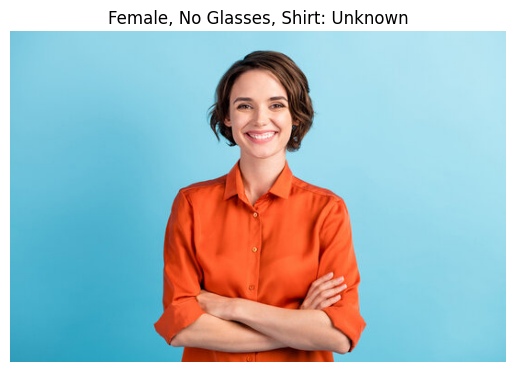

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model

# === Load your models ===
gender_model = load_model("C:\\Users\\rida6\\OneDrive\\Desktop\\Rida_Hanif\\Task_1\\gender_model.h5")
glasses_model = load_model("C:\\Users\\rida6\\OneDrive\\Desktop\\Rida_Hanif\\Task_1\\glasses_classifier_model.h5")
shirt_model = load_model("C:\\Users\\rida6\\OneDrive\\Desktop\\Rida_Hanif\\Task_1\\shirt_color_model.h5")
\
# === Function to load and preprocess image using OpenCV ===
def load_and_preprocess_image(img_path):
    img = cv2.imread(img_path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img_resized = cv2.resize(img_rgb, (150, 150))  # Match model input shape
    img_normalized = img_resized / 255.0
    input_img = np.expand_dims(img_normalized, axis=0)
    return input_img, img_rgb  # original image for display

# === Final prediction function ===
def predict_all(image_path):
    input_img, display_img = load_and_preprocess_image(image_path)

    # Predict
    gender_pred = gender_model.predict(input_img)[0]
    glasses_pred = glasses_model.predict(input_img)[0]
    shirt_pred = shirt_model.predict(input_img)[0]

    # Decode results
    gender = 'Male' if np.argmax(gender_pred) == 1 else 'Female'
    glasses = 'Glasses' if np.argmax(glasses_pred) == 1 else 'No Glasses'

    # Prevent IndexError
    shirt_color_list = ['Black', 'Blue', 'White', 'Red', 'Green']
    shirt_index = np.argmax(shirt_pred)
    if shirt_index < len(shirt_color_list):
        shirt_color = shirt_color_list[shirt_index]
    else:
        shirt_color = "Unknown"

    # Display results
    print("Gender:", gender)
    print("Glasses:", glasses)
    print("Shirt Color:", shirt_color)

    plt.imshow(display_img)
    plt.title(f"{gender}, {glasses}, Shirt: {shirt_color}")
    plt.axis('off')
    plt.show()

# === Run the prediction ===
predict_all("C:\\Users\\rida6\\OneDrive\\Desktop\\test_image.jpg")


In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from keras.models import load_model
import os

# === Load models ===
gender_model = load_model("models/gender_model.h5")
glasses_model = load_model("models/glasses_model.h5")
shirt_model = load_model("models/shirt_color_model.h5")

# === Helper function ===
def load_and_preprocess_image(image_path, target_size=(224, 224)):
    image = cv2.imread(image_path)
    if image is None:
        raise FileNotFoundError(f"Image not found at {image_path}")
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image_resized = cv2.resize(image_rgb, target_size)
    image_array = np.array(image_resized) / 255.0
    image_array = np.expand_dims(image_array, axis=0)
    return image_array, image_rgb  # return processed and display version

# === Main prediction function ===
def predict_all(image_path):
    input_img, display_img = load_and_preprocess_image(image_path)

    # Predictions
    gender_pred = gender_model.predict(input_img)[0]
    glasses_pred = glasses_model.predict(input_img)[0]
    shirt_pred = shirt_model.predict(input_img)[0]

    gender = "Male" if np.argmax(gender_pred) == 1 else "Female"
    glasses = "Glasses" if np.argmax(glasses_pred) == 1 else "No Glasses"
    
    # Update this list to match your training classes exactly
    shirt_color_list = ["Black", "Blue", "White", "Red", "Green"]

    if len(shirt_pred) != len(shirt_color_list):
        raise ValueError(f"Shirt model output size {len(shirt_pred)} does not match label list size {len(shirt_color_list)}")

    shirt_color = shirt_color_list[np.argmax(shirt_pred)]

    # Print and display result
    print(f"Gender: {gender}")
    print(f"Glasses: {glasses}")
    print(f"Shirt Color: {shirt_color}")

    plt.imshow(display_img)
    plt.title(f"{gender}, {glasses}, Shirt: {shirt_color}")
    plt.axis("off")
    plt.show()

# === Run on test image ===
if __name__ == "__main__":
    test_image_path = "sample_image.jpg"  # Change to your image path
    predict_all(test_image_path)
